In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/input/df.csv', index_col='datetime')
df.index = pd.to_datetime(df.index, utc=True)

In [3]:
df['datetimeja'] = df.index.tz_convert('Asia/Tokyo')

In [4]:
df.head()

,stepCount,datetimeja
datetime,,
2017-06-27 23:04:40+00:00,504,2017-06-28 08:04:40+09:00
2017-06-27 23:14:34+00:00,871,2017-06-28 08:14:34+09:00
2017-06-27 23:22:53+00:00,25,2017-06-28 08:22:53+09:00
2017-06-27 23:29:45+00:00,29,2017-06-28 08:29:45+09:00
2017-06-27 23:36:05+00:00,17,2017-06-28 08:36:05+09:00


In [5]:
len(df)

15460

In [6]:
df['date'] = df['datetimeja'].dt.date

In [7]:
daySummary = df.groupby(['date']).sum()

In [8]:
daySummary.head()

,stepCount
date,
2017-06-28,6651
2017-06-29,7063
2017-06-30,8806
2017-07-01,4053
2017-07-02,19320


In [9]:
daySummary.describe()

,stepCount
count,583.000000
mean,8145.135506
std,4613.848107
min,402.000000
25%,5432.500000
50%,7296.000000
75%,9917.500000
max,60924.000000


In [10]:
(daySummary >= 8000).mean()

stepCount    0.430532
dtype: float64

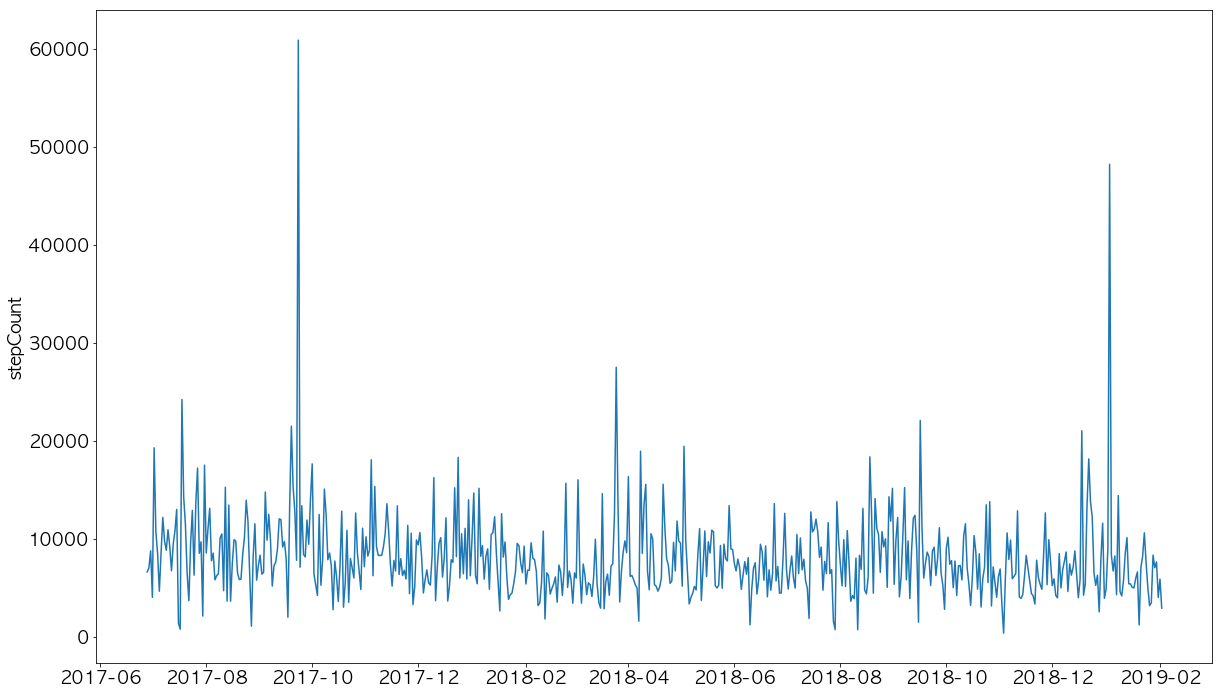

In [11]:
plt.figure(figsize=(20, 12))
plt.rcParams["font.size"] = 18
plt.ylabel('stepCount')
plt.plot(daySummary)